# Global Energy Budget

Let's read a netcdf file that include information on global energy budget. <br>
First, let's import modules that we will be using.

In [3]:
import matplotlib.pyplot as plt # a module necessary to make a plot
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs

Open and read the file. We will be uploading the file on GitHub, so you don't have to upload it any more.

In [4]:
filename='surface_energy2016.nc'

print(filename)
# read data
f=Dataset(filename,'a')
print (f.variables.keys())

/Users/jungeunl/Cycad/class/data/surface_energy2016.nc
odict_keys(['longitude', 'latitude', 'time', 'sshf', 'slhf', 'ssr', 'str'])


Daily energy: J/m2  --> to convert W/m2, divide by 24*3600

In [3]:
daysec=24.*3600.
lw=f.variables['str'][:]/daysec  # downward net LW
sw=f.variables['ssr'][:]/daysec  # downward net SW
lh=f.variables['slhf'][:]/daysec  # downward net latent heat flux
sh=f.variables['sshf'][:]/daysec  # downward net sensible heat flux
lat=f.variables['latitude'][:]
lon=f.variables['longitude'][:]


Let's calculate annual average.

In [4]:
lwa=np.mean(lw,axis=0)
swa=np.mean(sw,axis=0)
lha=np.mean(lh,axis=0)
sha=np.mean(sh,axis=0)

In [8]:
# net radiation
nr= swa+lwa
print (nr.shape)


(241, 480)


Plot the net radiation.

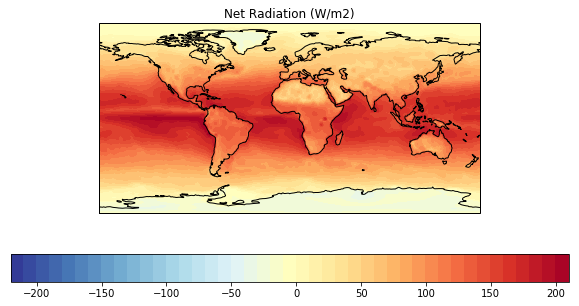

In [24]:
# Make a plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# color map
cmap1=plt.cm.RdYlBu_r

# set contour levels
levels = np.arange(-220,220,10)

# for mon in range(nmon):
cs=ax.contourf(lon,lat,nr,levels,transform=ccrs.PlateCarree(),cmap=cmap1)
plt.title('Net Radiation (W/m2)') #title
plt.colorbar(cs, orientation='horizontal') # color map

# draw the coastline
ax.coastlines()
ax.set_global()

#### Net upward energy flux
Plot net upward energy flux.
First let's calculate net downward energy flux.

In [14]:
# net upward energy flux
nf= -(swa+lwa+lha+sha)
print (nf.shape)

(241, 480)


#### Exercise
Plot net downward energy flux.

#### Exercise
Plot average latent heat flux (-lha).

#### Exercise
Plot average sensible heat flux (-sha).